#Submitted By
#Name: Nikhil Ambati
#UBIT: namabti
#UBNO: 50495129

#Name: Jayakrishna Pavuluri
#UBIT: jpavulur 
#UBNO: 50495130

# 1.Loading Libraries

In [31]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron, 
    SoftmaxRegression
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# 2. Peforming EDA

In [12]:
df = pd.read_csv(r'C:\Users\Nikhil\Sem 2\Machine Learning\WELFake_Dataset.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [13]:
df = df.drop(df.columns[:1], axis=1)

In [14]:
df.head(5)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
title    558
text      39
label      0
dtype: int64


In [16]:
df = df.fillna('')

In [17]:
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
title    0
text     0
label    0
dtype: int64


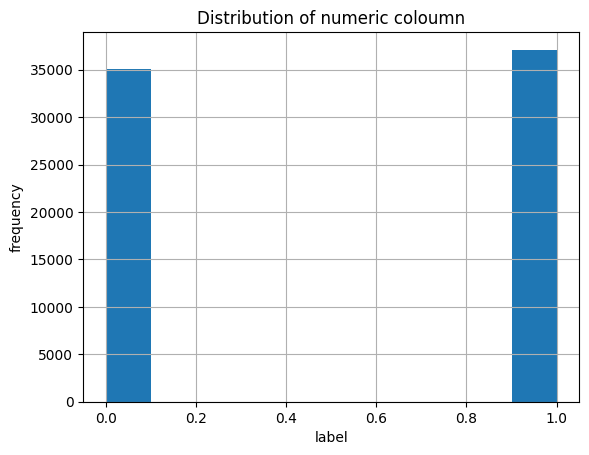

In [18]:
df['label'].hist()
plt.xlabel('label')
plt.ylabel('frequency')
plt.title('Distribution of numeric coloumn')
plt.show()

# I am concatenating the title and text into one column. I will use as X train further.

In [19]:
df = df.assign(title_text=df["title"] + df["text"])

# Below is a Wordcloud form to see how most common words.

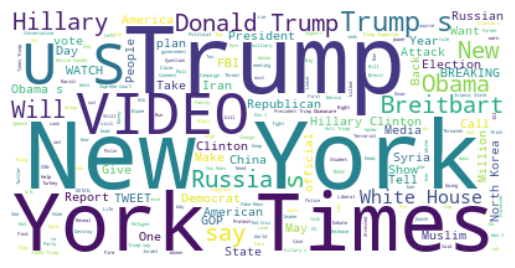

In [20]:
temp = ' '.join(title for title in df['title'] if isinstance(title, str))
wc = WordCloud(background_color="white", repeat=True).generate(temp)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [21]:
df = df.drop(['title', 'text'], axis=1)

# I used is method to change the text to lower and make sure its alpnumeric.

In [22]:
def clean(para):
    para = re.sub('[^a-z A-Z 0-9-]+', '', para)
    para = para.lower()
    return para

In [23]:
df['title_text'] = df['title_text'].apply(clean)

In [24]:
def splitss(text):
    text_list = text.split()
    return text_list
df['Review_lists'] = df['title_text'].apply(splitss)

# I basically did the below graph to check if we have stopwords. Later I have removed them.

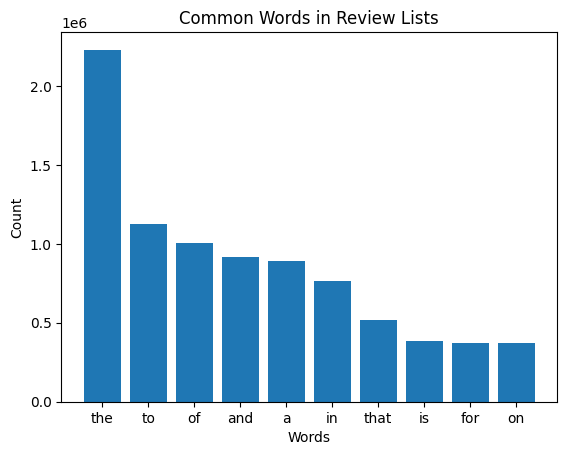

In [25]:
all_words = [word for sublist in df['Review_lists'] for word in sublist]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)  
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Common Words in Review Lists')
plt.show()

# Model Training Starts

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['title_text'], df['label'], test_size=0.33, random_state=53)

In [27]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [28]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Accuracy: 87.73%
Accuracy 0.8773
Precision 0.8786
Recall 0.8773
F1_Score 0.8779
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     11640
           1       0.90      0.85      0.88     12165

    accuracy                           0.88     23805
   macro avg       0.88      0.88      0.88     23805
weighted avg       0.88      0.88      0.88     23805



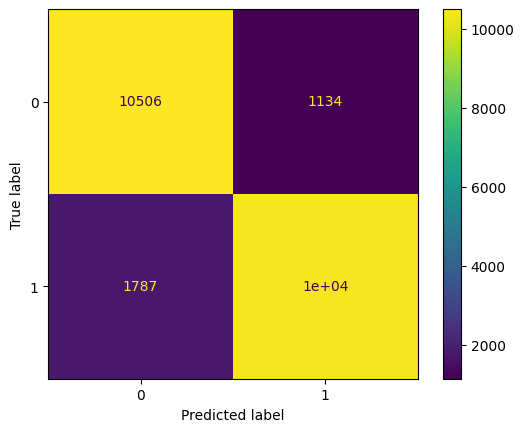

In [32]:
y_pred_nb = nb_classifier.predict(X_test)
score_nb=accuracy_score(y_test,y_pred_nb)
print(f'Accuracy: {round(score_nb*100,2)}%')
accuracy = accuracy_score(y_test, y_pred_nb )
precision = precision_score(y_test, y_pred_nb , average="weighted")
recall = recall_score(y_test, y_pred_nb , average="weighted")
f1_score = 2 * (precision * recall) / (precision + recall)
cm = confusion_matrix(y_test, y_pred_nb)

print("Accuracy", round(accuracy, 4))
print("Precision", round(precision, 4))
print("Recall", round(recall, 4))
print("F1_Score", round(f1_score, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
print(classification_report(y_test, y_pred_nb))

Accuracy: 96.71%
Accuracy 0.9671
Precision 0.9671
Recall 0.9671
F1_Score 0.9671
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11640
           1       0.96      0.97      0.97     12165

    accuracy                           0.97     23805
   macro avg       0.97      0.97      0.97     23805
weighted avg       0.97      0.97      0.97     23805



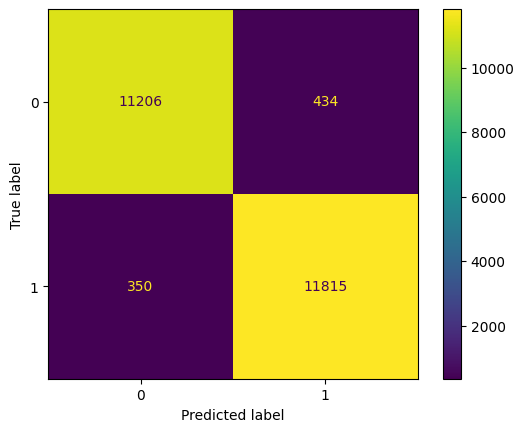

In [33]:
pac=PassiveAggressiveClassifier(max_iter=10000)
pac.fit(X_train,y_train)
y_pred_pac=pac.predict(X_test)
score_pac=accuracy_score(y_test,y_pred_pac)
print(f'Accuracy: {round(score_pac*100,2)}%')
accuracy = accuracy_score(y_test, y_pred_pac)
precision = precision_score(y_test, y_pred_pac, average="weighted")
recall = recall_score(y_test, y_pred_pac, average="weighted")
f1_score = 2 * (precision * recall) / (precision + recall)
cm = confusion_matrix(y_test, y_pred_pac)

print("Accuracy", round(accuracy, 4))
print("Precision", round(precision, 4))
print("Recall", round(recall, 4))
print("F1_Score", round(f1_score, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
print(classification_report(y_test, y_pred_pac))


In [34]:
svc_model = SVC(kernel='linear', C=1.0)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)



Accuracy: 96.64%
Accuracy 0.9664
Precision 0.9664
Recall 0.9664
F1_Score 0.9664
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11640
           1       0.96      0.97      0.97     12165

    accuracy                           0.97     23805
   macro avg       0.97      0.97      0.97     23805
weighted avg       0.97      0.97      0.97     23805



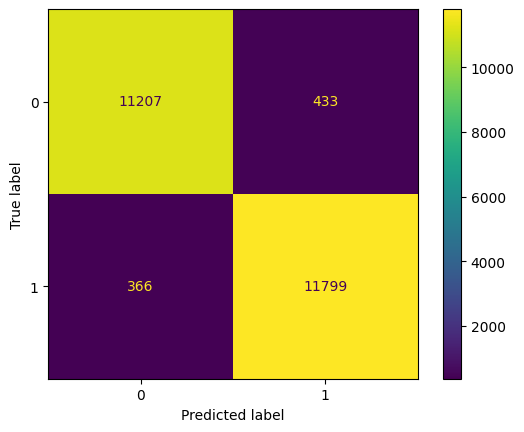

In [36]:
score_svc=accuracy_score(y_test,y_pred_svc)
print(f'Accuracy: {round(score_svc*100,2)}%')
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, average="weighted")
recall = recall_score(y_test, y_pred_svc, average="weighted")
f1_score = 2 * (precision * recall) / (precision + recall)
cm = confusion_matrix(y_test, y_pred_svc)
print("Accuracy", round(accuracy, 4))
print("Precision", round(precision, 4))
print("Recall", round(recall, 4))
print("F1_Score", round(f1_score, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
print(classification_report(y_test, y_pred_svc))

